In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from group_sae.utils import palette

## MAAD

In [10]:
p160_eval = pd.read_csv("eval/pythia_160m_jumprelu_cluster.csv")
p160_maad = pd.read_json("../groups/maad/pythia_160m.json").T

p410_eval = pd.read_csv("eval/pythia_410m_jumprelu_cluster.csv")
p410_maad = pd.read_json("../groups/maad/pythia_410m.json").T

g2_eval = pd.read_csv("eval/gemma2_2b_jumprelu_cluster.csv")
g2_maad = pd.read_json("../groups/maad/gemma2_2b.json").T

In [11]:
p160_eval = p160_eval.join(p160_maad["maad"], on="G")
p410_eval = p410_eval.join(p410_maad["maad"], on="G")
g2_eval = g2_eval.join(g2_maad["maad"], on="G")

In [12]:
p160_plot = p160_eval.groupby("G").mean()
p410_plot = p410_eval.groupby("G").mean()
g2_plot = g2_eval.groupby("G").mean()

Text(0.5, 0, 'MAAD')

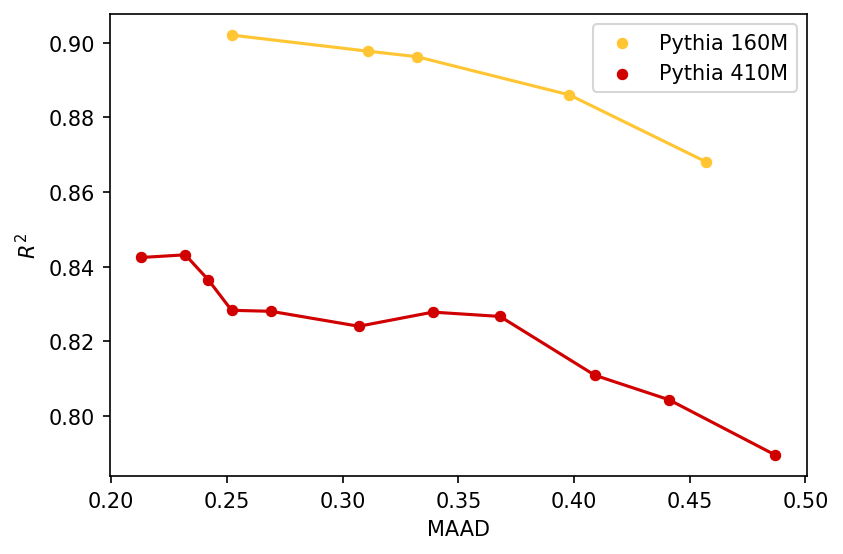

In [22]:
fig = plt.figure(figsize=(6, 4), dpi=150)

sns.lineplot(p160_plot, x="maad", y="explained_variance", color=palette[0])
sns.scatterplot(p160_plot, x="maad", y="explained_variance", label="Pythia 160M", color=palette[0])

sns.lineplot(p410_plot, x="maad", y="explained_variance", color=palette[3])
sns.scatterplot(p410_plot, x="maad", y="explained_variance", label="Pythia 410M", color=palette[3])

plt.ylabel(r"$R^2$")
plt.xlabel("MAAD")